# Two Layer Neural Network From Scratch 
## Gamze Aksu - 171180005

In this assignment, a two-layer neural network will be developed from scratch. Later, the developed neural network will be implemented using the Iris Flower dataset. The Iris Flower dataset consists of 50 samples from each of three species of Iris flower (Iris Setosa, Iris virginica, and Iris versicolor). It contains four different features as the length and the width of the sepals and petals.


The content of this assignment will be as follows:
1. Data Explore and Visualization
2. Explanation of Neural Network
3. Coding of the Neural Network
4. Implementation

## Data Explore and Visualization

### Libraries 

In [1]:
import numpy as np                
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Data Explore

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head()  #The first five lines are shown.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(['Id'],axis=1,inplace = True)
#The 'Id' column is unnecessary for training so it is dropped

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum().sum() 
#There are no null values in the dataset

0

In [7]:
data['Species'].unique()
#There are three different Iris flower species in the dataset.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualization  

#### Species Distribution

The Iris Flower dataset has equally distributed species and there are 50 records of each species.

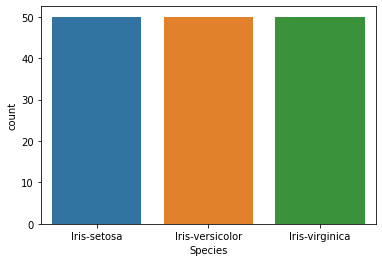

In [8]:
sns.countplot(x="Species",data=data)
plt.show()

#### Scatter Plot by Sepal Length and Width

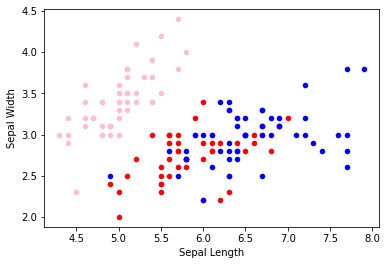

In [9]:
# for the setosa species
x1 = data[data.Species =='Iris-setosa'].SepalLengthCm
y1 = data[data.Species =='Iris-setosa'].SepalWidthCm

plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker =".",
            s = 50) 

# for the versicolor species
x2 = data[data.Species =='Iris-versicolor'].SepalLengthCm
y2 = data[data.Species =='Iris-versicolor'].SepalWidthCm

plt.scatter(x2, y2, c ="red",
            linewidths = 2,
            marker =".",
            s = 50) 

# for the virginica species
x3 = data[data.Species =='Iris-virginica'].SepalLengthCm
y3 = data[data.Species =='Iris-virginica'].SepalWidthCm

plt.scatter(x3, y3, c ="blue",
            linewidths = 2,
            marker =".",
            s = 50) 

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#### Scatter Plot by Petal Length and Width

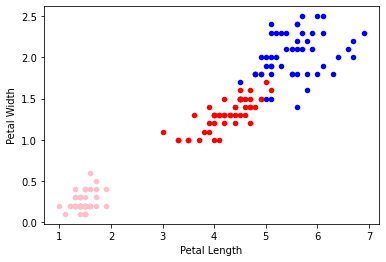

In [10]:
# for the setosa species
x1 = data[data.Species =='Iris-setosa'].PetalLengthCm
y1 = data[data.Species =='Iris-setosa'].PetalWidthCm

plt.scatter(x1, y1, c ="pink",
            linewidths = 2,
            marker =".",
            s = 50) 

# for the versicolor species
x2 = data[data.Species =='Iris-versicolor'].PetalLengthCm
y2 = data[data.Species =='Iris-versicolor'].PetalWidthCm

plt.scatter(x2, y2, c ="red",
            linewidths = 2,
            marker =".",
            s = 50) 

# for the virginica species
x3 = data[data.Species =='Iris-virginica'].PetalLengthCm
y3 = data[data.Species =='Iris-virginica'].PetalWidthCm

plt.scatter(x3, y3, c ="blue",
            linewidths = 2,
            marker =".",
            s = 50) 

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

#### Preprocessing

Within the dataset, the species class consists of characters as 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'. These should be converted to digital and one hot encoding should be done.

In [26]:
x = data.drop(["Species"],axis=1)
y = data.Species
y = np.array(pd.get_dummies(y))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.series.Series'>
(120, 4)
(30, 4)
(120, 3)
(30, 3)


## Explanation of Neural Network

## What is Neural Networks

Artificial neural networks represent the human brain. The learning process is modeled mathematically by taking the human brain as an example. Artificial neural networks emerged as a result of mathematical modeling. In artificial neural networks, data is interpreted through models. It is made especially for recognizing patterns. Patterns detected by neural networks are vectorial and numerical. Artificial neural networks can be used to solve problems such as image processing. [1]

Artificial neural networks are made up of neurons. These neurons are also called perceptrons. 

A perceptron consists of two layers. It can be called the inputs layer and the outputs layer. Perceptron components are as follows: weights, biases and activation function.


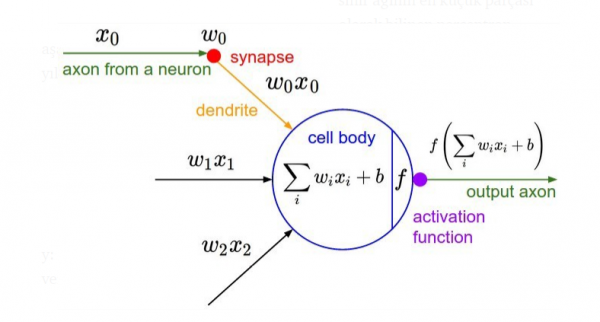

### Inputs, Weights and Biases

Inputs consist of x_train data that we give while the neural network is being trained.

There is a weight for each input. These weights determine which input should be given more attention. Weights are initialized first with the random normal distribution. These weights are updated during training.

During training, the inputs and weights are multiplied. When this multiplication result is zero, learning does not occur. This situation is prevented by bias values. In the absence of bias values, the model always passes through the origin.

Weights and bias values are initialized with the random normal distribution first. This initialization is done in the init_weights function, which is called inside the __init__ function that runs when the class is called.

The shape of the weights and bias values is important. Since each input and weight will be multiplied, the weights (weights_layer1) for the first layer will be shaped to the properties of the inputs (4 ie layer[0]) and the number of perceptron(layer[1]) in the first layer.

The shape of the bias values is the number of perceptrons in that layer.
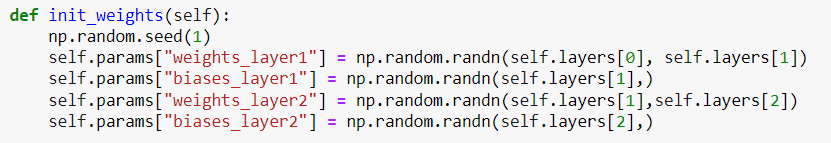

### Activation Functions

There are activation functions to introduce nonlinear properties such as real-world properties to neural networks. Percepton output has activation functions. The output of the activation function forms the input of another layer. There are many different activation functions. Examples include Sigmoid, Hyperbolic Tangent, ReLU (Rectified Linear Unit) and Leaky ReLU. ReLU and Softmax activation functions are used in this assignment.

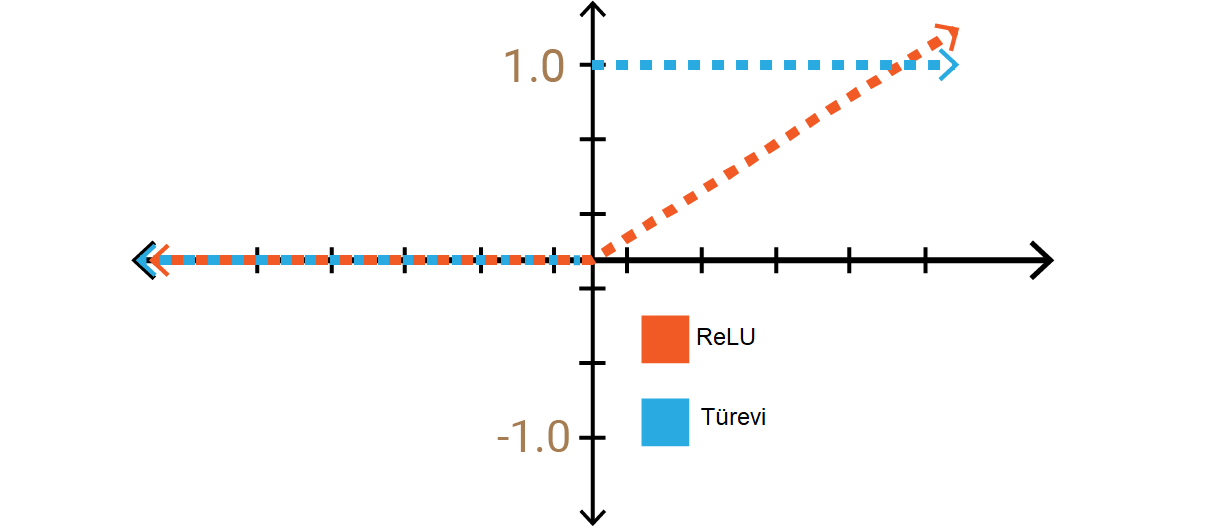
Values less than zero in the ReLU activation function take the value zero. Values greater than zero do not change. In the derivative of the ReLU function, values less than zero are equal to zero, while the derivative value is one for values greater than zero.
The computational load of the ReLU function is very low. However, learning does not occur because the result will be zero with a value of zero.


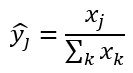
Softmax function is generally used for multi-class outputs. Since we also have three different Iris Flower species, this function was chosen in the last layer.

The Softmax operation compresses the probability distribution between 0 and 1. This ensures that the probability result is positive. The maximum value remains maximum, even if the probability value falls within the range of 0 - 1.

## Perceptron

In a perceptron, the inputs X = [x1, x2, …, xₘ] and the weights W = [w1, w2, …, wₘ] are multiplied. It is then summed with the bias value. This sum result was named z1 for the first layer. Then, the ReLU activation function was used in the first layer. The z1 value is given to the ReLU activation function and its output becomes the input of the other layer. Since the second layer is the last layer, the softmax activation function was used.

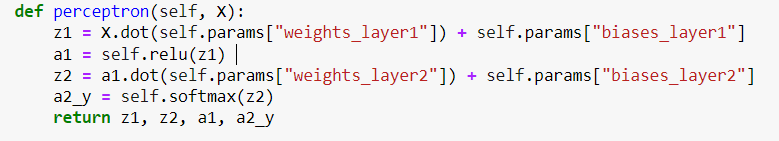

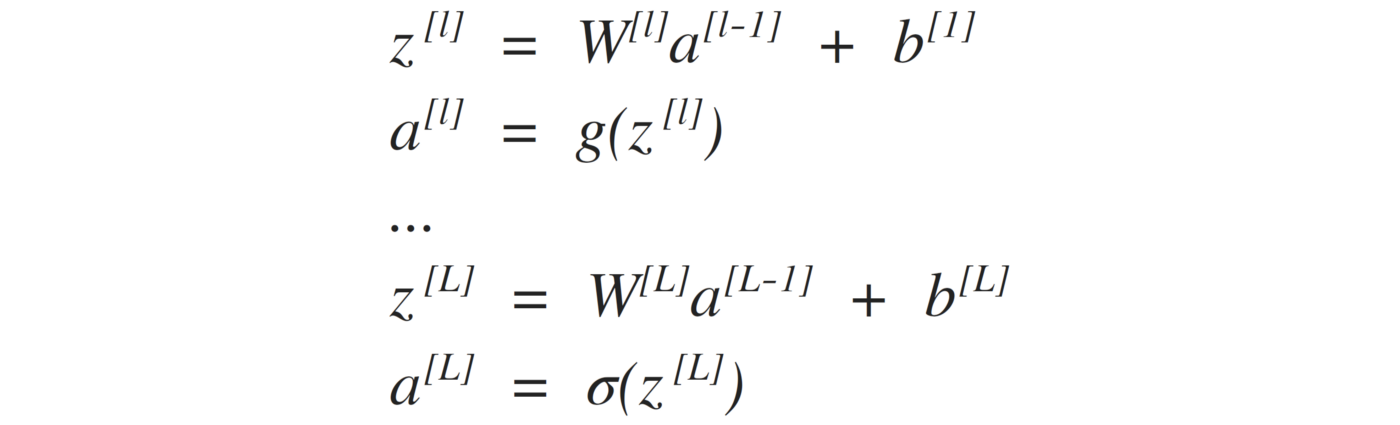

## Forward Propagation

In forward propagation, an output estimate is generated with the current weights and bias values. The perceptron function is used for estimation. In the Perceptron function, a2_y is the final output, that is, the prediction. This estimation result is compared with the actual values and a loss value is found. The loss value found is saved and then used while plotting the loss plot.

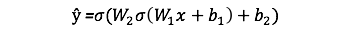

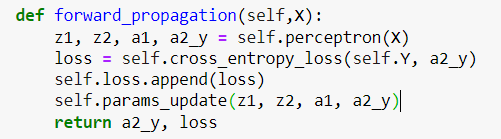

In the params_update function, the outputs are saved as a model parameter for later use.
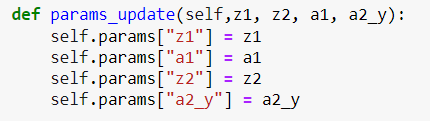

## Back Propagation

The purpose of backpropagation is to update the weights and bias values. Forward propagation proceeds from left to right, backward propagation proceeds from right to left. Going from the estimation output to the weights and bias values. Derivatives are performed while going backwards.

In back propagation, first the difference between the true Y values ​​and the predicted Y value in forward propagation is taken. This is done with the cross_entropy function. Then this output is multiplied by the transpose of the weights in the second layer. These weights are transposed because these variables are matrices and must satisfy the necessary size condition for the matrices to be multiplied. If the variable to be used for updating the w2 value is new_w2, the derivative of the z2 value calculated by the transpose of the a1 outputs is found by multiplying (b_z2). The new_b2 to be used to update the b2 value is obtained as a result of adding the b_z2 values.

When we come to the first layer, the b_a1 value calculated in the second layer is multiplied with the z1 values ​​given as input to the derivative of the relu function. Then, new_w1 and new_b1 values ​​are calculated as in the second layer.

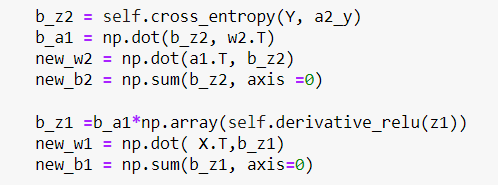

Then, in order to update these weights and bias values, the product of the newly calculated weight and bias values with the learning rate is subtracted from the old weights and bias values.

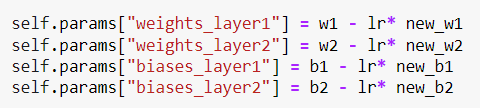

## Fit

Training is performed with the x_train and y_train values obtained in the fit function. Forward and backward propagation takes place in sequence according to the number of epochs. A prediction occurs with each forward propagation. The prediction result is compared with the actual result. Then the weights and bias values are updated by back propagation. Forward propagation occurs again with the updated values.
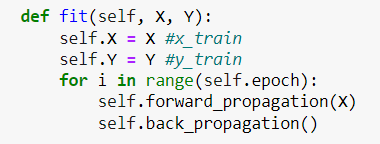

## Predict

In the predict function, a prediction is made by calling the perceptron function. These estimates are then corrected with the argmax function.
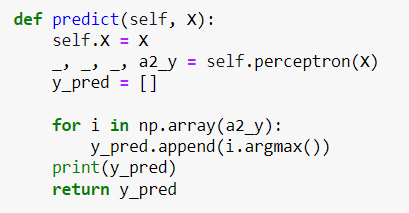

### Accuracy Score

While calculating the Accuracy score, the actual values are first passed through the argmax function. Then the expected values are compared with the predicted values. The score value increases with each match.

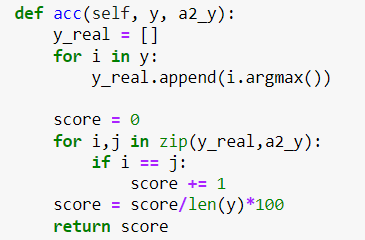

## Coding of Two-Layer Neural Network

In [24]:
class NeuralNet():

    def __init__(self, layers=[4,5,3], learning_rate=0.00001, epoch=100):
        self.params = {}        
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.loss = []
        self.layers = layers
        self.X = None
        self.Y = None
        self.init_weights()

    def init_weights(self):
        np.random.seed(1) 
        self.params["weights_layer1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params["biases_layer1"] = np.random.randn(self.layers[1],)
        self.params["weights_layer2"] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params["biases_layer2"] = np.random.randn(self.layers[2],)
                
    def relu(self,Z):
        return np.maximum(Z,0)
    
    def derivative_relu(self,Z):
        Z[Z > 0] = 1
        Z[Z <=  0] = 0
        return Z
    
    def softmax(self,Z):
        exponential = np.exp(Z)
        sum_ = np.sum(exponential)
        result = exponential / sum_  
        return result
    
    def cross_entropy(self, y, y_out):
        n = y.shape[0]
        res = np.abs(np.array(y_out) - np.array(y))
        print('----------------error-----------------')
        print(y.shape,y_out.shape)
        print((res/n).shape)
        return res/n
    
    def cross_entropy_loss(self,y,y_out):      
        loss=-np.sum(y * np.log(np.array(y_out)))
        return loss/y_out.shape[0]
    
    def cross_entropy_loss1(self,real,pred):
        n_samples = real.shape[0]
        pred = np.array(pred)
        logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
        loss = np.sum(logp)/n_samples
        return loss
    
    def perceptron(self, X):
        print('------------------perceptron---------------')
        print('X',self.X.shape)
        print('w1',self.params['weights_layer1'].shape)
        print('dot',self.X.dot(self.params["weights_layer1"]).shape)
        z1 = X.dot(self.params["weights_layer1"]) + self.params["biases_layer1"]
        a1 = self.relu(z1) 
        z2 = a1.dot(self.params["weights_layer2"]) + self.params["biases_layer2"]
        a2_y = self.softmax(z2)
        print('yhat',a2_y)
        return z1, z2, a1, a2_y       
    
    def forward_propagation(self,X):
        z1, z2, a1, a2_y = self.perceptron(X)
        loss = self.cross_entropy_loss(self.Y, a2_y)        
        self.loss.append(loss)
        self.params_update(z1, z2, a1, a2_y)                   
        return a2_y, loss  
    
    def params_update(self,z1, z2, a1, a2_y):
        self.params["z1"] = z1
        self.params["a1"] = a1
        self.params["z2"] = z2
        self.params["a2_y"] = a2_y
        
    def back_propagation(self):
        w1 = self.params["weights_layer1"]
        w2 = self.params["weights_layer2"]
        b1 = self.params["biases_layer1"]
        b2 = self.params["biases_layer2"]
        
        z1 = self.params["z1"]
        a1= self.params["a1"]  
        z2 = self.params["z2"] 
        
        a2_y = self.params["a2_y"]
        Y = self.Y
        X = self.X
        
        b_z2 = self.cross_entropy(Y, a2_y)         
        b_a1 = np.dot(b_z2, w2.T)  
        new_w2 = np.dot(a1.T, b_z2) 
        new_b2 = np.sum(b_z2, axis =0)
        
        b_z1 =b_a1*np.array(self.derivative_relu(z1))
        new_w1 = np.dot( X.T,b_z1)
        new_b1 = np.sum(b_z1, axis=0)

        self.update_weights(new_w1,new_w2,new_b1,new_b2)
    
    def update_weights(self,new_w1,new_w2,new_b1,new_b2):
        w1 = self.params["weights_layer1"]
        w2 = self.params["weights_layer2"]
        b1 = self.params["biases_layer1"]
        b2 = self.params["biases_layer2"]
        lr = self.learning_rate
        
        self.params["weights_layer1"] = w1 - lr* new_w1
        self.params["weights_layer2"] = w2 - lr* new_w2
        self.params["biases_layer1"] = b1 - lr* new_b1
        self.params["biases_layer2"] = b2 - lr* new_b2
    
    def fit(self, X, Y):
        self.X = X #x_train
        self.Y = Y #y_train
        for i in range(self.epoch):
            self.forward_propagation(X)
            self.back_propagation()
            
    def predict(self, X):
        self.X = X
        _, _, _, a2_y = self.perceptron(X)
        y_pred = []

        for i in np.array(a2_y):
            y_pred.append(i.argmax())
        print(y_pred)
        return y_pred
    
    def acc(self, y, a2_y):
        y_real = []
        for i in y:
            y_real.append(i.argmax())
            
        score = 0
        for i,j in zip(y_real,a2_y):
            if i == j:
                score += 1
        score = score/len(y)*100
        return score
    
    def plot_loss(self):
        
        plt.plot(self.loss)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss curve for training")
        plt.show() 

# Implementation

------------------perceptron---------------
X (120, 4)
w1 (4, 5)
dot (120, 5)
yhat             0             1         2
137  0.001050  2.503014e-03  0.004988
84   0.003570  9.641457e-05  0.010765
27   0.020184  1.682334e-07  0.012968
127  0.001841  6.301946e-04  0.007312
132  0.000884  4.797243e-03  0.004704
..        ...           ...       ...
9    0.015112  8.416859e-08  0.009357
103  0.000789  2.691897e-03  0.003484
67   0.001356  4.796972e-05  0.002495
117  0.000551  1.366152e-01  0.006027
47   0.023455  7.214677e-08  0.012391

[120 rows x 3 columns]
----------------error-----------------
(120, 3) (120, 3)
(120, 3)
------------------perceptron---------------
X (120, 4)
w1 (4, 5)
dot (120, 5)
yhat             0             1         2
137  0.001050  2.503014e-03  0.004988
84   0.003570  9.641457e-05  0.010765
27   0.020184  1.682334e-07  0.012968
127  0.001841  6.301946e-04  0.007312
132  0.000884  4.797243e-03  0.004704
..        ...           ...       ...
9    0.015112  8.41685

yhat             0             1         2
137  0.001050  2.503014e-03  0.004988
84   0.003570  9.641457e-05  0.010765
27   0.020184  1.682334e-07  0.012968
127  0.001841  6.301946e-04  0.007312
132  0.000884  4.797243e-03  0.004704
..        ...           ...       ...
9    0.015112  8.416859e-08  0.009357
103  0.000789  2.691897e-03  0.003484
67   0.001356  4.796972e-05  0.002495
117  0.000551  1.366152e-01  0.006027
47   0.023455  7.214677e-08  0.012391

[120 rows x 3 columns]
----------------error-----------------
(120, 3) (120, 3)
(120, 3)
------------------perceptron---------------
X (120, 4)
w1 (4, 5)
dot (120, 5)
yhat             0             1         2
137  0.001050  2.503014e-03  0.004988
84   0.003570  9.641457e-05  0.010765
27   0.020184  1.682334e-07  0.012968
127  0.001841  6.301946e-04  0.007312
132  0.000884  4.797243e-03  0.004704
..        ...           ...       ...
9    0.015112  8.416859e-08  0.009357
103  0.000789  2.691897e-03  0.003484
67   0.001356  4.796972e

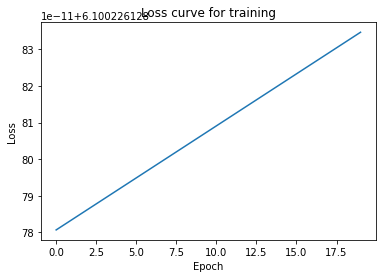

In [25]:
Network = NeuralNet(layers=[4,5,3], learning_rate=0.000000000001, epoch=20)
Network.fit(x_train,y_train)
y_pred = Network.predict(x_test)
print("Accuracy:",Network.acc(y_test,y_pred))
Network.plot_loss()

X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 

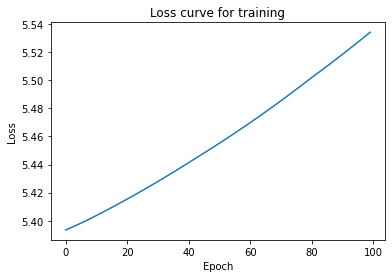

In [14]:
Network = NeuralNet(layers=[4,6,3], learning_rate=0.0001, epoch=100)
Network.fit(x_train,y_train)
y_pred = Network.predict(x_test)
print("Accuracy:",Network.acc(y_test,y_pred))
Network.plot_loss()

X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 (4, 5)
dot (120, 5)
X (120, 4)
w1 

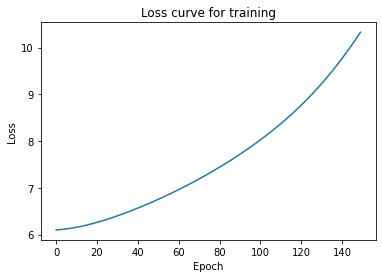

In [15]:
Network = NeuralNet(layers=[4,5,3], learning_rate=0.001, epoch=150)
Network.fit(x_train,y_train)
y_pred = Network.predict(x_test)
print("Accuracy:",Network.acc(y_test,y_pred))
Network.plot_loss()

X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 (4, 6)
dot (120, 6)
X (120, 4)
w1 

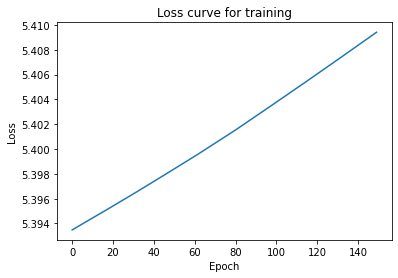

In [16]:
Network = NeuralNet(layers=[4,6,3], learning_rate=0.00001, epoch=150)
Network.fit(x_train,y_train)
y_pred = Network.predict(x_test)
print("Accuracy:",Network.acc(y_test,y_pred))
Network.plot_loss()

Experiments were made with different learning rates, different epochs and different dens. The best values were found to be [layers=[4,6,3], learning_rate=0.0001, epoch=100 ] and [layers=[4,6,3], learning_rate=0.00001, epoch=150].